In [471]:
import csv



import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specify each path

In [472]:
dataset = 'model/keypoint_classifier/keypoint.csv'
saved_model_dir = 'model/keypoint_classifier/saved_model'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

# Set number of classes

In [473]:
NUM_CLASSES = 5

# Dataset reading

In [474]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [475]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [476]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [477]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [478]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_28"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout_56 (Dropout)            │ (None, 42)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_84 (Dense)                │ (None, 20)             │           860 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_57 (Dropout)            │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_85 (Dense)                │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_86 (Dense)                │ (None, 5)              │            55 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,125 (4.39 KB)

 Trainable params: 1,125 (4.39 KB)

 Non-trainable params: 0 (0.00 B)

In [479]:
# Define the base path for the model save location
model_base_path = 'model/keypoint_classifier/keypoint_classifier'

# Ensure the filepath ends with '.keras' for saving the full model
model_save_path = model_base_path + '.keras'

# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [480]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [481]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 10s 366ms/step - accuracy: 0.1562 - loss: 1.6945
Epoch 1: saving model to model/keypoint_classifier/keypoint_classifier.keras
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1875 - loss: 1.6238 - val_accuracy: 0.4428 - val_loss: 1.4650
Epoch 2/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.3594 - loss: 1.4706
Epoch 2: saving model to model/keypoint_classifier/keypoint_classifier.keras
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3521 - loss: 1.4462 - val_accuracy: 0.5482 - val_loss: 1.2925
Epoch 3/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.3906 - loss: 1.3817
Epoch 3: saving model to model/keypoint_classifier/keypoint_classifier.keras
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4262 - loss: 1.3178 - val_accuracy: 0.6062 - val_loss: 1.1610
Epoch 4/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4688 - loss: 1.2492
Epoch 4: saving model to model/keypoint_classifier/keypoint_classifier.ker


Epoch 8: saving model to model/keypoint_classifier/keypoint_classifier.keras
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5643 - loss: 1.0344 - val_accuracy: 0.7230 - val_loss: 0.8528
Epoch 9/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5703 - loss: 0.9811
Epoch 9: saving model to model/keypoint_classifier/keypoint_classifier.keras
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5631 - loss: 1.0081 - val_accuracy: 0.7459 - val_loss: 0.8184
Epoch 10/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6484 - loss: 0.9977
Epoch 10: saving model to model/keypoint_classifier/keypoint_classifier.keras
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5975 - loss: 0.9827 - val_accuracy: 0.7647 - val_loss: 0.7784
Epoch 11/1000
 1/29 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5938 - loss: 0.9711
Epoch 11: saving model to model/keypoint_classifier/keypoint_classifier.keras
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5988 - loss: 0.9730 - val_ac

In [482]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9446 - loss: 0.2605 


In [483]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [484]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
[9.2591739e-01 6.1784040e-02 6.3909037e-04 6.2750616e-05 1.1596612e-02]
0


# Confusion matrix

39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 315us/step


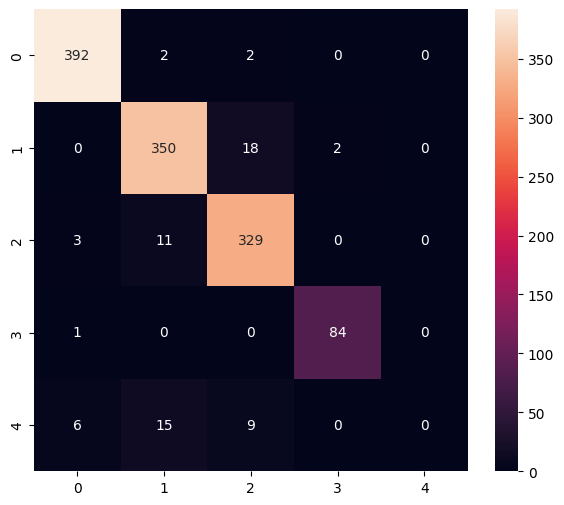

Classification Report
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       396
           1       0.93      0.95      0.94       370
           2       0.92      0.96      0.94       343
           3       0.98      0.99      0.98        85
           4       0.00      0.00      0.00        30

    accuracy                           0.94      1224
   macro avg       0.76      0.78      0.77      1224
weighted avg       0.92      0.94      0.93      1224



/Users/austinking/Computer Vision Project/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/austinking/Computer Vision Project/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/austinking/Computer Vision Project/venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

In [485]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [486]:
# Save as a model dedicated to inference

# model_save_path = 'model/keypoint_classifier/keypoint_classifier_saved_model.keras'
# model.save(model_save_path)

# model.save('model/keypoint_classifier/keypoint_classifier')
# model.save(model_save_path, include_optimizer=False)
 
# import os
# if not os.path.exists(saved_model_dir):
#     os.makedirs(saved_model_dir)

# # tf.saved_model.save(model, saved_model_dir)

# tf.saved_model.save(model, saved_model_dir)

# # Check if the SavedModel file exists
# if os.path.exists(saved_model_dir):
#     print("SavedModel file successfully created.")
# else:
#     print("Failed to create SavedModel file.")


# Alternatie approach

import os
base_dir = './model/keypoint_classifier/weights/'
architecture_path = os.path.join(base_dir, 'model_architecture.json')
weights_path = os.path.join(base_dir, 'model_weights.weights.h5')

# Check if the base directory exists, if not, create it
if not os.path.exists(base_dir):
    os.makedirs(base_dir)

# Save the model architecture to JSON
with open(architecture_path, 'w') as f:
    f.write(model.to_json())
print(f"Model architecture saved to: {architecture_path}")

# Save the model weights
model.save_weights(weights_path)
print(f"Model weights saved to: {weights_path}")

Model architecture saved to: ./model/keypoint_classifier/weights/model_architecture.json
Model weights saved to: ./model/keypoint_classifier/weights/model_weights.weights.h5


In [487]:
# Transform model (quantization)
# best_model = tf.keras.models.load_model(model_save_path)

# converter = tf.lite.TFLiteConverter.from_keras_model(best_model)

# model = tf.keras.models.load_model(model_save_path, compile=False)



# converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_dir)
# converter.optimizations = [tf.lite.Optimize.DEFAULT]
# tflite_quantized_model = converter.convert()

# tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'
# with open(tflite_save_path, 'wb') as f:
#     f.write(tflite_quantized_model)

# saved_model_path = 'model/keypoint_classifier/keypoint_classifier_saved_model.keras'
# model.save(model_save_path)

# # loaded_model = tf.saved_model.load(saved_model_path)

# converter = tf.lite.TFLiteConverter.from_saved_model(saved_model_path)
# # converter = tf.lite.TFLiteConverter.from_saved_model(model_save_path)
# converter.optimizations = [tf.lite.Optimize.DEFAULT]
# tflite_quantized_model = converter.convert()

# tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'
# with open(tflite_save_path, 'wb') as f:
#     f.write(tflite_quantized_model)

# Specify the path for saving the model's architecture



with open(architecture_path, 'r') as f:
    loaded_model = tf.keras.models.model_from_json(f.read())

# Load the weights into the model
loaded_model.load_weights(weights_path)
print("Model loaded successfully with architecture and weights.")

Model loaded successfully with architecture and weights.


# Inference test

In [488]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [489]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [490]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [491]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])


# Display the results
print("TFLite model prediction:", np.argmax(np.squeeze(tflite_results)))

# Optionally, compare it with the TensorFlow model's prediction for the same input
tf_prediction = model.predict(np.array([X_test[0]]))
print("TensorFlow model prediction:", np.argmax(np.squeeze(tf_prediction)))

TFLite model prediction: 0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
TensorFlow model prediction: 0
CPU times: user 77.6 ms, sys: 2.26 ms, total: 79.9 ms
Wall time: 25.8 ms


In [492]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[9.9073547e-01 9.2182858e-03 4.4497760e-05 1.6523495e-06]
0
